# Tensors - Interactive Session

TensorFlow - Tensors #2 by Roshan [youtube](https://www.youtube.com/watch?v=UHrRiHl0Kqg&t=1844s) [github](https://github.com/TwistedHardware/mltutorial/blob/master/notebooks/tf/2.%20Tensors.ipynb)

<table>
    <tr>
        <td style="text-align:left;"><div style="font-family: monospace; font-size: 2em; display: inline-block; width:60%">2. Tensors</div><img src="img/roshan.png" style="width:30%; display: inline; text-align: left; float:right;"></td>
        <td></td>
    </tr>
</table>

Before we go into tensors and programming in TensorFlow, let's take a look at how does it work.

# TensorFlow Basics

TensorFlow has a few concepts that you should be familiar with. TensorFlow executes your code inside an execution engine that you communicate with using an API. In TensorFlow your data is called a `Tensor` that you can apply operations (`OPs`) to. Your code is converted into a `Graph` that is executed in an execution engine called a `Session`. So your python code is just a representation of your graph that can be executed in a session.

![](images/graph.png)

You can see how your data (or tensors) flow from one operation to the next, hence the name TensorFlow.

Since version 1.5 and as of version 1.8 there are two methods to execute code in TensorFlow:

- Graph Execution
- Eager Execution

The main difference is graph execution is a type of `declarative programming` and eager execution is a type of `imperative programming`. In plain English, the difference is graph execution defines your code as a graph and executes in a session. Your objects in python are not the actual objects inside the session, they are only a reference to them. Eager execution executes your code as you run it giving you a better control of your program while it is running so you are not stuck with a predefined graph.

## So why do we even bother with graph execution?

Performance is a big issue in machine learning and a small difference in execution time can save you in a long project weeks of your time and 1000s of hours of GPU time. Support is another issue for now where some features of TensorFlow do not work in Eager Execution like high level estimators.

We will focus in the following tutorials only on graph execution and we will cover eager execution later in this series.

# Tensors

Tensors represent your data. It a scalar variable or an array of any dimension. Tensors are the main object to store and pass data between operations, the input and output of all operations are always tensors.

## Tensor Shape and Rank

Tensors have a rank and a shape so for scalar values, we use rank-0 tensors of a shape `()` which is an empty shape

Assuming we need a variable or a constant number to use in our software, we can represent it as a tensor of rank-0.

![](images/rank-0.png)

A rank-1 tensor can be though of as an __vector__ or a one dimensional array. creating a rank-1 tensor with shape `(3)` will create a tensor that can hold three values in a one-dimensional array.

![](images/rank-1.png)


A rank-2 is a __matrix__ or a two dimensional array. This can be used to hold two dimensional data like a black and white image. The shape of the tensor can match the shape of the image so to hold a 256x256 pixel image in a tensor, you can create a rank-2 tensor of shape `(256,256)`.

![](images/rank-2.png)


A rank-3 tensor is a three dimensional array. It can be used to hold three dimensional data like a color image represented in (RGB). To create a tensor to hold an color image of size 256x256, you can create a rank-3 tensor of shape `(256,256,3)`.

![](images/rank-3.png)


TensorFlow allows tensors in higher dimensions but you will very rarely see tensors of a rank exceeding 5 `(batch size, width, height, RGB, frames)` for representing a batch of video clips.

## Importing Tensor Flow

Let's import TensorFlow and start working with some tensors.

In [1]:
import tensorflow as tf
import sys

print("Python Version:",sys.version.split(" ")[0])
print("TensorFlow Version:",tf.VERSION)

/Users/sungchul/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/sungchul/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Python Version: 3.5.3
TensorFlow Version: 1.8.0


# Graph Execution

TensorFlow executes your code inside a C++ program and returns the results through the TensorFlow API. Since we are using Python, we will be using TensorFlow Python API which is the most documented and most used API of TensorFlow.

Since we are using graph execution, there are two ways to create a session:

- Session
- Interactive Session

Sessions and interactive sessions, use your code to build a "Graph" which is a representation of your code inside TensorFlow's execution engine. The main difference between them is, an interactive session makes itself the default session. Since we are using only one session for our code, we will use that.

For now let's start an interactive session and start flowing some tensors!

In [2]:
sess = tf.InteractiveSession()

# Generating new Tensors

Since we have an interactive session, let's create a tensor. There are two common ways to create a tensor `tf.zeros()` and `tf.ones()`. Each one of them takes a python tuple or an array as the shape of the tensor.

Let's start be creating a rank-0 tensor.

In [3]:
a = tf.zeros(())

We create a tensor and assigned it to a local variable named `a`. When we check the value of `a` this is what we get.

In [4]:
a

<tf.Tensor 'zeros:0' shape=() dtype=float32>

Notice there is no value. You need to call `eval()` method of the tensor to get the actual value. This method takes an optional parameter where you can pass your session. Since we are using interactive session, we don't have ato pass anything.

In [5]:
a.eval()

0.0

You should know that `eval()` method returns a numpy.float32 (or what ever the type of the tensor is) if the rank of the tensor is 0 and numpy.ndarray if the tensor has rank 1 or higher.

 > __Numpy__: is a multi-dimensional array library for python that runs the operations in a C program and interfaces back with python to ensure fast array operations.

We can also check the rank and shape of the tensor.

In [6]:
a.shape

TensorShape([])

the rank would be the number of dimensions.

In [7]:
a.shape.ndims

0

Notice the name inside the TensorFlow execution engine is not `a`. It is `zeros:0` which is an auto generated name for the variable. The auto generated name is the name of the operation that generated the tensor and then an the index of the of the tensor in the output of the operation.

In [8]:
a.name

'zeros:0'

If you created another variable using the same operation, it will be named `zeros_1:0`.

In [9]:
tf.zeros(())

<tf.Tensor 'zeros_1:0' shape=() dtype=float32>

Now let's create a second tensor of shape (3) which is going to be a rank-1 tensor. This time we will name it `b` and store it in a local variable named `b`.

In [10]:
b = tf.zeros((3), name="b")
b

<tf.Tensor 'b:0' shape=(3,) dtype=float32>

Notice the name of the variable now is `b:0` which is the name that we gave it and the index of `0` of the return of the operation. We can also get the value in the same way using `eval()` method.

In [11]:
type(b.eval())

numpy.ndarray

You can also get the value of a tensor by executing the tensor using your session.

In [12]:
sess.run(b)

array([0., 0., 0.], dtype=float32)

You can also fill the tensor with any other value you want other than 0 and 1 using `fill()` function.

In [13]:
tf.fill((2,2), 5).eval()

array([[5, 5],
       [5, 5]], dtype=int32)

Notice that the data type of this tensor is `int32` and not `float32` because you initialized the tensor with an integer `5` and not `5.0`.

## Tensor Shape

For multi dimensional tensors, the shape is passed as a tuple or an array. The way this array is arranged is from the outer most dimension to the inner dimensions. So for a tensor that should represents 10 items and each item has three numbers, the shape would be `(10,3)`.

In [14]:
tf.zeros((10,3)).eval()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

__Note__: This is the opposite of the how matrix shape notation is written in mathematics. A matrix of shape $A_{(3,10)}$ can be represented in TensorFlow as `(10,3)`. The reason for that is in mathematics the shape is $(Columns,Rows)$ and TensorFlow uses `(Outer,Inner)` which translates in 2-D tensor as `(Rows,Columns)`.

For higher dimensions the same rules applies. Let say we have 2 items and each item has 3 parts and each part consists of 4 numbers the shape would be `(2,3,4)`

In [15]:
tf.zeros((2,3,4)).eval()

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

## Generating Tensors with Random Values

In many cases, you want to generate a new tensor but we want to start with random values stored in the tensor. The way we do that is using one the random generators of TensorFlow.

### Normal Distribution

`tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)`

In [16]:
arr1 = tf.random_normal((1000,))
arr1

<tf.Tensor 'random_normal:0' shape=(1000,) dtype=float32>

This function returns random values using normal distribution which is also known as Gaussian distribution or informally called a "Bell Curve". To better understand it, let's first look at a graph showing this distribution. In Mathematics, a normal distribution of mean $\mu$ and standard deviation $\sigma$ is denoted $N(\mu, \sigma)$ (More about that in "The Math Behind It").

To do that we will import Matplotlib which is a very common charting library for Python.

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

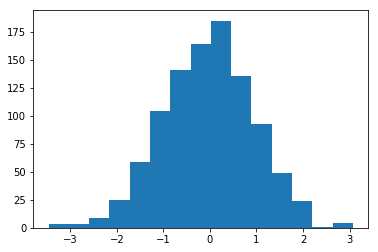

In [18]:
plt.hist(arr1.eval(), bins=15);

Notice the bill shape of the curve where you get more values around your mean a fewer values as you move away from the mean.

You can also change the mean.

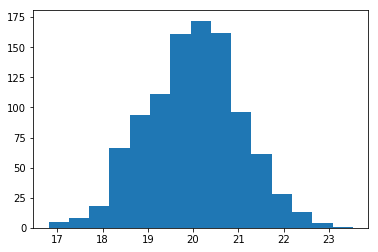

In [19]:
arr1 = tf.random_normal((1000,), mean=20.0)

plt.hist(arr1.eval(), bins=15);

You can also control how concentrated your random numbers will be around the mean by controlling the standard deviation. Higher standard deviation means less values around the mean and wider distribution.

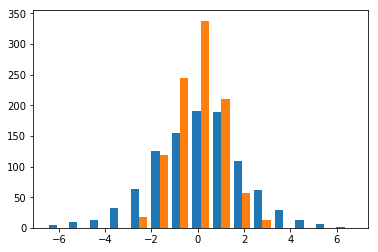

In [20]:
arr1 = tf.random_normal((1000,), stddev=2, name="arr1")
arr2 = tf.random_normal((1000,), stddev=1, name="arr2")

plt.hist([arr1.eval(), arr2.eval()], bins=15);

One more note on normal distribution, if you created a large tensor with millions or tens of millions of random values, some of these values will fall really far from the mean. With some machine learning algorithms this might create instability. You can avoid that by using `truncated_normal()` function instead of `random_normal()`. This will re-sample any values that falls more than 2 standard deviations from the mean.

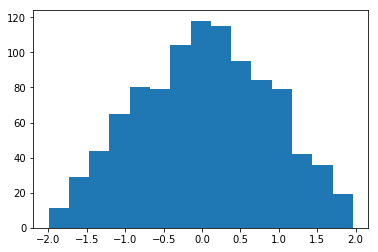

In [21]:
plt.hist(tf.truncated_normal((1000,)).eval(), bins=15);

### Uniform Distribution

The other common distribution is the uniform one. This will generate values with equal probability of falling anywhere between two numbers.

`tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)`

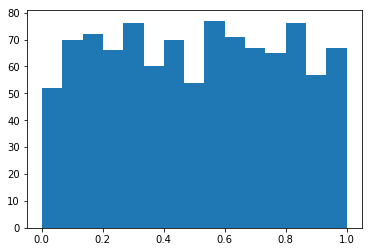

In [22]:
arr1 = tf.random_uniform((1000,))
plt.hist(arr1.eval(), bins=15);

## Generating Tensors with Sequence Values

You can generate tensors with sequence values using the following function:

`tf.range(start, limit=None, delta=1, dtype=None, name='range')`

In [23]:
tf.range(5).eval()

array([0, 1, 2, 3, 4], dtype=int32)

Which is equivalent to:

In [24]:
tf.range(0, 5).eval()

array([0, 1, 2, 3, 4], dtype=int32)

Notice that the output of `range()` function will never reach the limit parameter.

You can also control the delta which is the spacing between the tensor's elements.

In [25]:
tf.range(0, 5, 2).eval()

array([0, 2, 4], dtype=int32)

## Reshaping Tensors

You can reshape tensors using this function:

`tf.reshape(tensor, shape, name=None)`

In [26]:
a = tf.range(6)
tf.reshape(a, (3,2)).eval()

array([[0, 1],
       [2, 3],
       [4, 5]], dtype=int32)

# Tensor Arithmetics

You can use standard python arithmetics on tensors and get results in a new tensor.

## Addition

In [27]:
a = tf.ones((2,2))
b = tf.fill((2,2), 10.0) # Notice we used 10.0 and not 10 to ensure the data type will be float32

c = a + b
c.eval()

array([[11., 11.],
       [11., 11.]], dtype=float32)

## Element-wise Operations

In [28]:
d = c * 2.0
d.eval()

array([[22., 22.],
       [22., 22.]], dtype=float32)

In [29]:
(d + 3).eval()

array([[25., 25.],
       [25., 25.]], dtype=float32)

## Matrix Operations

TensorFlow support a variety of matrix operations.

### Identity Matrix

An identity matrix is a matrix where all the values are zeros exception diagonally where it has values of 1. This is an example of an identity matrix of shape (3,3).

$$\begin{bmatrix}
{1} & {0} & {0} \\
{0} & {1} & {0} \\
{0} & {0} & {1} \\
\end{bmatrix}$$

To do that in TensorFlow use the `tf.eye()` function.

In [30]:
i = tf.eye(3,3)
i.eval()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

### Transpose

Transpose is another operation that is commonly used in matrix calculations. Transpose converts rows to columns. Assume you have a matrix $\mathbf{A}$, a transpose operation over this matrix produces $\mathbf{A^T}$ pronounced _$\mathbf{A}$ transpose_.

In [31]:
a = tf.range(1,9)
i = tf.reshape(a, (2,4))
i.eval()

array([[1, 2, 3, 4],
       [5, 6, 7, 8]], dtype=int32)

In [32]:
it = tf.matrix_transpose(i)
it.eval()

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]], dtype=int32)

### Matrix Multiplication

One of the most common operations for matrices in deep learning in matrix multiplication. Matrix multiplication is not an element-wise operation. The exact math will be discussed in the last section of this tutorial "The Math Behind It". But for now to give you the basics you should know the following:

Assume we have two matrices $\mathbf{A}$ and $\mathbf{B}$. The shape of $\mathbf{A}$ is (m,n) and the shape of $\mathbf{B}$ is (o,p) we can write these two matrices with their shape as $\mathbf{A}_{(m,n)}$ and $\mathbf{B}_{(o,p)}$. Multiplying these two matrices produces a matrix of the shape (m,p) __IF__ $n=o$ like this:

$\mathbf{A}_{(m,n)} . \mathbf{B}_{(o,p)}=\mathbf{C}_{(m,p)} \leftarrow n=o$

Notice the inner shape of these two matrices is the same and the output matrix has the shape of the outer shape of these two matrices. If the inner shape of the matrices does not match the product doesn’t exist.

We can use `tf.matmul()` function to do that.

In [33]:
a = tf.ones((2,3))
b = tf.ones((3,4))

c = tf.matmul(a ,b)

print("c has the shape of:", c.shape)
c.eval()

c has the shape of: (2, 4)


array([[3., 3., 3., 3.],
       [3., 3., 3., 3.]], dtype=float32)

In [34]:
c.shape

TensorShape([Dimension(2), Dimension(4)])

In [35]:
print(c.shape)

(2, 4)


In [36]:
c.eval()

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.]], dtype=float32)

# The Math Behind It

## Standard Deviation $\sigma$ or $s$

Standard deviation is the measure of how elements in a set vary from the mean. So a sample with most data points close to the mean has low standard deviation and it gets higher as the data points start moving away from the mean. In statistics, standard deviation is denoted as the small letter sigma $\sigma$ or $s$.

The formula to calculate standard deviation for a whole population is:

$$\sigma={\sqrt {\frac {\sum_{i=1}^N(x_{i}-{\overline {x}})^{2}}{N}}}$$

Let's break it down and see how to calculate standard deviation.

Assume we have exam grades of 10 students and the grades are so follow:

| ID    | Grade  |
| ----- |:------:|
| 1     |  88    |
| 2     |  94    |
| 3     |  71    |
| 4     |  97    |
| 5     |  84    |
| 6     |  82    |
| 7     |  80    |
| 8     |  98    |
| 9     |  91    |
| 10    |  93    |

First thing we need to do is calculate the mean. The mean is denoted as $\overline {x}$ (_pronouned "x bar"_). To calculate the mean (or average) get the sum all numbers and divide it by their count. It is also commonly denoted as a small letter mu $\mu$. Assume you have $N$ values, this will be the formula to calculate the mean:

$$\overline {x} = \frac{x_1 + x_2 + ... + x_N}{N} = \frac{\sum_{i=1}^N x_i}{N}$$

So let's calculate that.

In [37]:
g = [88, 94, 71, 97, 84, 82, 80, 98, 91, 93]

total = sum(g)
count = len(g)

mean = total/count
mean

87.8

Now that we know the mean, we can go back to the original equation and calculate the standard deviation.

So looking at the equation one more:

$$\sigma={\sqrt {\frac {\sum_{i=1}^N(x_{i}-{\overline {x}})^{2}}{N}}}$$

First we need to get each element in our grades $x_i$ and subtract it from the mean $\overline {x}$ then square it and take the sum of that.

```python
a = [(x-mean)**2 for x in g]
b = sum(a)
```

Divide that by the number of elements $N$ then take the square root

```python
variance = b / count
σ = sqrt(variance)
```

We can write the whole thing in one like this:

In [38]:
from math import sqrt

σ = sqrt(sum([(x-mean)**2 for x in g]) / count)
σ

8.096912991998865

Note that standard deviation is a build in function in NumPy, TensorFlow and many other languages and libraries.

In [39]:
import numpy as np

np.std(g)

8.096912991998865

In TensorFlow

In [40]:
t = tf.constant(g, dtype=tf.float64)

In [41]:
mean_t, var_t = tf.nn.moments(t, axes=0)
sqrt(var_t.eval())

8.096912991998865

In [42]:
try:
    mean_t, var_t = tf.nn.moments(t)
except Exception as e:
    print(e)

moments() missing 1 required positional argument: 'axes'


### Variance $\sigma^2$, $s^2$ or $Var(X)$

It is just the square of the standard deviation.

In [43]:
variance = sum([(x-mean)**2 for x in g]) / count
variance

65.56

## Matrix Multiplication

Arguably, the most common matrix operation you will perform in deep learning is multiplying matrices. Understanding this operation is a good start to understanding the math behind neural networks. This operation is also known as "dot product".

Assume we have two matrices $\mathbf{A}_{(2,3)}$ and $\mathbf{B}_{(3,2)}$. The dot product of these two matrices $\mathbf{A}_{(2,3)} . \mathbf{B}_{(3,2)}$ is calculated as follows:

$\mathbf{A}_{(2,3)} = \begin{bmatrix}
{1} & {0} \\
{3} & {2} \\
{1} & {4} \\
\end{bmatrix}$

$\mathbf{B}_{(3,2)} = \begin{bmatrix}
{2} & {1} & {2} \\
{1} & {2} & {3} \\
\end{bmatrix}$

$\mathbf{C}_{(2,2)} = \mathbf{A}_{(2,3)} . \mathbf{B}_{(3,2)}$

$\mathbf{C}_{(2,2)} = \begin{bmatrix}
{2\times1 + 3\times1 + 1\times2} & {0\times2 + 2\times1 + 4\times2} \\
{1\times1 + 3\times2 + 1\times3} & {0\times1 + 2\times2 + 4\times3} \\
\end{bmatrix} = \begin{bmatrix}
{2 + 3 + 2} & {0 + 2 + 8} \\
{1 + 6 + 3} & {0 + 4 + 12} \\
\end{bmatrix}= \begin{bmatrix}
{7} & {10} \\
{10} & {16} \\
\end{bmatrix}$

This is an animation to shows how that is done step by step.

![](images/Webp.net-gifmaker.gif)

Now let's confirm it with TensorFlow.

In [44]:
a = [[1,0],
     [3,2],
     [1,4]]

b = [[2,1,2],
     [1,2,3]]

Remember from before, that mathematical shape of a matrix is opposite of TensorFlow shape of a tensor. So instead of rewriting our arrays, we will just use transpose you make rows into columns and columns into rows.

In [45]:
a = tf.constant(a)
b = tf.constant(b)

c = tf.matmul(tf.matrix_transpose(a), tf.matrix_transpose(b))

c.eval()

array([[ 7, 10],
       [10, 16]], dtype=int32)

In [46]:
a = [[1,0],
     [3,2],
     [1,4]]

b = [[2,1,2],
     [1,2,3]]

In [47]:
a = tf.constant(a)
b = tf.constant(b)

c = tf.matmul(a, b)

c.eval()

array([[ 2,  1,  2],
       [ 8,  7, 12],
       [ 6,  9, 14]], dtype=int32)

Luckily there is also a easier way to to that.

In [48]:
c = tf.matmul(a,b, transpose_a=True, transpose_b=True)

c.eval()

array([[ 7, 10],
       [10, 16]], dtype=int32)

<center>This work in <b>open sourced</b> and licensed under GNU General Public License v2.0<br />

Copyright © 2018 Abdullah Alrasheed and other contributes<br /><br />Roshan Logo is not open sourced and is not covered by the GNU license</center>